<a href="https://colab.research.google.com/github/Ivan8Garcia/challenge-data-science/blob/main/CHALLENGE_TELECOMX_LATAM.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#**EXTRACCION**

In [1]:
import pandas as pd

In [2]:
url="https://raw.githubusercontent.com/alura-cursos/challenge2-data-science-LATAM/refs/heads/main/TelecomX_Data.json"

In [3]:
datos= pd.read_json(url)
datos.head()

,customerID,Churn,customer,phone,internet,account
0,0002-ORFBO,No,"{'gender': 'Female', 'SeniorCitizen': 0, 'Part...","{'PhoneService': 'Yes', 'MultipleLines': 'No'}","{'InternetService': 'DSL', 'OnlineSecurity': '...","{'Contract': 'One year', 'PaperlessBilling': '..."
1,0003-MKNFE,No,"{'gender': 'Male', 'SeniorCitizen': 0, 'Partne...","{'PhoneService': 'Yes', 'MultipleLines': 'Yes'}","{'InternetService': 'DSL', 'OnlineSecurity': '...","{'Contract': 'Month-to-month', 'PaperlessBilli..."
2,0004-TLHLJ,Yes,"{'gender': 'Male', 'SeniorCitizen': 0, 'Partne...","{'PhoneService': 'Yes', 'MultipleLines': 'No'}","{'InternetService': 'Fiber optic', 'OnlineSecu...","{'Contract': 'Month-to-month', 'PaperlessBilli..."
3,0011-IGKFF,Yes,"{'gender': 'Male', 'SeniorCitizen': 1, 'Partne...","{'PhoneService': 'Yes', 'MultipleLines': 'No'}","{'InternetService': 'Fiber optic', 'OnlineSecu...","{'Contract': 'Month-to-month', 'PaperlessBilli..."
4,0013-EXCHZ,Yes,"{'gender': 'Female', 'SeniorCitizen': 1, 'Part...","{'PhoneService': 'Yes', 'MultipleLines': 'No'}","{'InternetService': 'Fiber optic', 'OnlineSecu...","{'Contract': 'Month-to-month', 'PaperlessBilli..."


In [4]:
columnas= list(datos.columns)
columnas

['customerID', 'Churn', 'customer', 'phone', 'internet', 'account']

In [5]:
datos_normalizado = pd.json_normalize(datos)
datos_normalizado

""
0
1
2
3
4
5


In [6]:
# Re-load the data as a list of dictionaries
import requests
import json

response = requests.get(url)
data_list = json.loads(response.text)

datos_normalizado = pd.json_normalize(data_list,
                                      # Specify keys from the top level or nested structures
                                      meta=['customerID', 'Churn',
                                            ['customer', 'gender'],
                                            ['customer', 'SeniorCitizen'],
                                            ['customer', 'Partner'],
                                            ['customer', 'Dependents'],
                                            ['customer', 'tenure'],
                                            ['phone', 'PhoneService'],
                                            ['phone', 'MultipleLines'],
                                            ['internet', 'InternetService'],
                                            ['internet', 'OnlineSecurity'],
                                            ['internet', 'OnlineBackup'],
                                            ['internet', 'DeviceProtection'],
                                            ['internet', 'TechSupport'],
                                            ['internet', 'StreamingTV'],
                                            ['internet', 'StreamingMovies'],
                                            ['account', 'Contract'],
                                            ['account', 'PaperlessBilling'],
                                            ['account', 'PaymentMethod'],
                                            ['account', 'MonthlyCharges'],
                                            ['account', 'TotalCharges']
                                           ])


print(datos_normalizado.head())

   customerID Churn customer.gender  customer.SeniorCitizen customer.Partner  \
0  0002-ORFBO    No          Female                       0              Yes   
1  0003-MKNFE    No            Male                       0               No   
2  0004-TLHLJ   Yes            Male                       0               No   
3  0011-IGKFF   Yes            Male                       1              Yes   
4  0013-EXCHZ   Yes          Female                       1              Yes   

  customer.Dependents  customer.tenure phone.PhoneService phone.MultipleLines  \
0                 Yes                9                Yes                  No   
1                  No                9                Yes                 Yes   
2                  No                4                Yes                  No   
3                  No               13                Yes                  No   
4                  No                3                Yes                  No   

  internet.InternetService  ... 

In [7]:
datos_normalizado.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7267 entries, 0 to 7266
Data columns (total 21 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   customerID                 7267 non-null   object 
 1   Churn                      7267 non-null   object 
 2   customer.gender            7267 non-null   object 
 3   customer.SeniorCitizen     7267 non-null   int64  
 4   customer.Partner           7267 non-null   object 
 5   customer.Dependents        7267 non-null   object 
 6   customer.tenure            7267 non-null   int64  
 7   phone.PhoneService         7267 non-null   object 
 8   phone.MultipleLines        7267 non-null   object 
 9   internet.InternetService   7267 non-null   object 
 10  internet.OnlineSecurity    7267 non-null   object 
 11  internet.OnlineBackup      7267 non-null   object 
 12  internet.DeviceProtection  7267 non-null   object 
 13  internet.TechSupport       7267 non-null   objec

#**TRANSFORMACION**

In [8]:
import numpy as np

In [9]:
# prompt: Ahora que ya has extraído y realizado el análisis inicial de los datos, es momento de asegurarte de que estén limpios y listos para las siguientes etapas.
# En esta fase, el objetivo es identificar y corregir inconsistencias que podrían afectar tanto el análisis como, más adelante, la creación de modelos predictivos.
#  Qué debes revisar:,
# Valores ausentes (missing values),
# Datos duplicados,
# Errores de formato (por ejemplo, fechas con formatos distintos, números guardados como texto),
# Categorías inconsistentes (como "Sí", "si", "SÍ", "Yes", etc.),
# Estos pequeños errores pueden generar resultados engañosos en los análisis y modelos. ¡Limpia tus datos con cuidado!
#  Algunas funciones útiles de Pandas:,
# pandas.unique: para ver los valores únicos de una columna categórica e identificar inconsistencias.,
# Series.dt.normalize: para normalizar fechas, eliminando información de hora cuando no es necesaria.,

# Verificar valores ausentes
print("\nValores ausentes por columna:")
print(datos_normalizado.isnull().sum())

# Verificar datos duplicados
print("\nNúmero de filas duplicadas:", datos_normalizado.duplicated().sum())

# Eliminar duplicados si existen
datos_normalizado.drop_duplicates(inplace=True)
print("Duplicados eliminados. Nuevo número de filas:", len(datos_normalizado))

# Identificar columnas categóricas para revisar inconsistencias
categorical_cols = datos_normalizado.select_dtypes(include='object').columns
print("\nValores únicos en columnas categóricas para identificar inconsistencias:")
for col in categorical_cols:
  print(f"\nColumna: {col}")
  print(datos_normalizado[col].unique())
  # Ejemplo de corrección de categorías inconsistentes (ajustar según sea necesario)
  # if col == 'gender':
  #   datos_normalizado[col] = datos_normalizado[col].replace({'Male': 'Male', 'Female': 'Female'}) # Ejemplo, ajustar a los valores encontrados

# Convertir 'TotalCharges' a float, manejando posibles errores
# Se usa errors='coerce' para convertir valores no numéricos a NaN
datos_normalizado['account.Charges.Total'] = pd.to_numeric(datos_normalizado['account.Charges.Total'], errors='coerce')

# Después de convertir 'TotalCharges' a float, verificar si hay nuevos NaNs
print("\nValores ausentes después de convertir 'TotalCharges':")
datos_normalizado.isnull().sum()

# Revisar si hay columnas de fecha que necesiten normalización (no parece haber en este dataset, pero es un ejemplo)
# Si hubiera una columna de fecha 'FechaRegistro', por ejemplo:
# datos_normalizado['FechaRegistro'] = pd.to_datetime(datos_normalizado['FechaRegistro'], errors='coerce')
# datos_normalizado['FechaRegistro'] = datos_normalizado['FechaRegistro'].dt.normalize()

# Información final del DataFrame limpio (o con los pasos de limpieza aplicados)
print("\nInformación del DataFrame después de la limpieza inicial:")
datos_normalizado.info()

# Mostrar las primeras filas para verificar
print("\nPrimeras filas del DataFrame después de la limpieza inicial:")
print(datos_normalizado.head())


Valores ausentes por columna:
customerID                   0
Churn                        0
customer.gender              0
customer.SeniorCitizen       0
customer.Partner             0
customer.Dependents          0
customer.tenure              0
phone.PhoneService           0
phone.MultipleLines          0
internet.InternetService     0
internet.OnlineSecurity      0
internet.OnlineBackup        0
internet.DeviceProtection    0
internet.TechSupport         0
internet.StreamingTV         0
internet.StreamingMovies     0
account.Contract             0
account.PaperlessBilling     0
account.PaymentMethod        0
account.Charges.Monthly      0
account.Charges.Total        0
dtype: int64

Número de filas duplicadas: 0
Duplicados eliminados. Nuevo número de filas: 7267

Valores únicos en columnas categóricas para identificar inconsistencias:

Columna: customerID
['0002-ORFBO' '0003-MKNFE' '0004-TLHLJ' ... '9992-UJOEL' '9993-LHIEB'
 '9995-HOTOH']

Columna: Churn
['No' 'Yes' '']

Columna: c

In [10]:
datos_normalizado.head()

,customerID,Churn,customer.gender,customer.SeniorCitizen,customer.Partner,customer.Dependents,customer.tenure,phone.PhoneService,phone.MultipleLines,internet.InternetService,...,internet.OnlineBackup,internet.DeviceProtection,internet.TechSupport,internet.StreamingTV,internet.StreamingMovies,account.Contract,account.PaperlessBilling,account.PaymentMethod,account.Charges.Monthly,account.Charges.Total
0,0002-ORFBO,No,Female,0,Yes,Yes,9,Yes,No,DSL,...,Yes,No,Yes,Yes,No,One year,Yes,Mailed check,65.6,593.30
1,0003-MKNFE,No,Male,0,No,No,9,Yes,Yes,DSL,...,No,No,No,No,Yes,Month-to-month,No,Mailed check,59.9,542.40
2,0004-TLHLJ,Yes,Male,0,No,No,4,Yes,No,Fiber optic,...,No,Yes,No,No,No,Month-to-month,Yes,Electronic check,73.9,280.85
3,0011-IGKFF,Yes,Male,1,Yes,No,13,Yes,No,Fiber optic,...,Yes,Yes,No,Yes,Yes,Month-to-month,Yes,Electronic check,98.0,1237.85
4,0013-EXCHZ,Yes,Female,1,Yes,No,3,Yes,No,Fiber optic,...,No,No,Yes,Yes,No,Month-to-month,Yes,Mailed check,83.9,267.40


In [11]:
datos_normalizado.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7267 entries, 0 to 7266
Data columns (total 21 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   customerID                 7267 non-null   object 
 1   Churn                      7267 non-null   object 
 2   customer.gender            7267 non-null   object 
 3   customer.SeniorCitizen     7267 non-null   int64  
 4   customer.Partner           7267 non-null   object 
 5   customer.Dependents        7267 non-null   object 
 6   customer.tenure            7267 non-null   int64  
 7   phone.PhoneService         7267 non-null   object 
 8   phone.MultipleLines        7267 non-null   object 
 9   internet.InternetService   7267 non-null   object 
 10  internet.OnlineSecurity    7267 non-null   object 
 11  internet.OnlineBackup      7267 non-null   object 
 12  internet.DeviceProtection  7267 non-null   object 
 13  internet.TechSupport       7267 non-null   objec

In [12]:
# prompt: En esta etapa del desafío TelecomX, todavía estamos enfocados en el análisis exploratorio y descriptivo de los datos, por lo que puedes dejar las columnas
#"yes/no" como variables categóricas si vas a analizarlas por frecuencias, proporciones o visualizar sus relaciones con otras variables.

# Sin embargo, te adelanto que más adelante vamos a construir modelos predictivos. Para eso, generalmente es útil convertir esas columnas "yes/no" en valores
#booleanos (True/False o 1/0), ya que muchos algoritmos de machine learning requieren variables numéricas para poder procesarlas.

# Entonces, una buena estrategia es:
# Durante el análisis exploratorio, puedes trabajar con ellas como categóricas si eso te resulta más claro para interpretar los datos.,
# Pero al preparar los datos para modelado (más adelante), será importante transformarlas a formato numérico, como booleano o binario.,
# Si prefieres, ya puedes hacer esa transformación desde ahora (por ejemplo, reemplazar "Yes" por 1 y "No" por 0), y seguir trabajando normalmente.
#Solo asegúrate de documentar lo que hiciste para no perder el rastro de los cambios

# Mapear 'Yes' a 1 y 'No' a 0 en las columnas relevantes
# Identificar las columnas que contienen 'Yes'/'No'.
# Basado en la estructura de los datos y nombres de columnas:
cols_to_map = [
    'Churn',
    'customer.Partner',
    'customer.Dependents',
    'phone.MultipleLines', # Esta podría tener 'No phone service' también, mapearemos 'Yes'/'No' y dejaremos el resto.
    'internet.OnlineSecurity',
    'internet.OnlineBackup',
    'internet.DeviceProtection',
    'internet.TechSupport',
    'internet.StreamingTV',
    'internet.StreamingMovies',
    'account.PaperlessBilling'
]

for col in cols_to_map:
    # Usar replace para manejar solo 'Yes' y 'No', manteniendo otros valores si existen (como 'No phone service')
    datos_normalizado[col] = datos_normalizado[col].replace({'Yes': 1, 'No': 0})

# Para la columna 'customer.SeniorCitizen', parece ser 0/1 directamente, pero si tuviera 'Yes'/'No', se aplicaría el mismo mapeo.
# Vamos a verificar sus valores únicos por si acaso
print("\nValores únicos en 'customer.SeniorCitizen' después de la posible transformación:")
print(datos_normalizado['customer.SeniorCitizen'].unique())

# Verificar los cambios en las columnas mapeadas
print("\nPrimeras filas después de mapear 'Yes'/'No' a 1/0:")
print(datos_normalizado[cols_to_map].head())

# Información final para confirmar los tipos de datos
print("\nInformación del DataFrame después de mapear 'Yes'/'No':")
datos_normalizado.info()


Valores únicos en 'customer.SeniorCitizen' después de la posible transformación:
[0 1]

Primeras filas después de mapear 'Yes'/'No' a 1/0:
  Churn  customer.Partner  customer.Dependents phone.MultipleLines  \
0     0                 1                    1                   0   
1     0                 0                    0                   1   
2     1                 0                    0                   0   
3     1                 1                    0                   0   
4     1                 1                    0                   0   

  internet.OnlineSecurity internet.OnlineBackup internet.DeviceProtection  \
0                       0                     1                         0   
1                       0                     0                         0   
2                       0                     0                         1   
3                       0                     1                         1   
4                       0                     0       

/tmp/ipython-input-12-1762103559.py:27: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  datos_normalizado[col] = datos_normalizado[col].replace({'Yes': 1, 'No': 0})


Ahora que los datos están limpios, es momento de crear la columna "Cuentas_Diarias". Utiliza la facturación mensual para calcular el valor diario, proporcionando una visión más detallada del comportamiento de los clientes a lo largo del tiempo.

 Esta columna te ayudará a profundizar en el análisis y a obtener información valiosa para las siguientes etapas.

In [13]:
# prompt: Ahora que los datos están limpios, es momento de crear la columna "Cuentas_Diarias"  y tradúcela en inglés.
#Utiliza la facturación mensual para calcular el valor diario, proporcionando una visión más detallada del comportamiento de los clientes a lo largo del tiempo.

# Crear la columna "Cuentas_Diarias" (Daily_Charges)
# Suponiendo que la facturación mensual es 'account.Charges.Monthly'
# Y que se divide entre 30 días para obtener un valor diario aproximado.
# Traducir a inglés según la instrucción.

# Ensure the column exists and is numeric
if 'account.Charges.Monthly' in datos_normalizado.columns:
  # Convert to numeric, handling potential errors
  datos_normalizado['account.Charges.Monthly'] = pd.to_numeric(datos_normalizado['account.Charges.Monthly'], errors='coerce')

  # Calculate Daily Charges
  # Check if the column is numeric before performing division
  if pd.api.types.is_numeric_dtype(datos_normalizado['account.Charges.Monthly']):
      datos_normalizado['Daily_Charges'] = datos_normalizado['account.Charges.Monthly'] / 30
  else:
      print("Error: 'account.Charges.Monthly' is not numeric. Cannot calculate 'Daily_Charges'.")
else:
  print("Error: 'account.Charges.Monthly' column not found.")


# Mostrar las primeras filas con la nueva columna para verificar
print("\nPrimeras filas del DataFrame con la nueva columna 'Daily_Charges':")
print(datos_normalizado[['account.Charges.Monthly', 'Daily_Charges']].head())

# Información final del DataFrame para ver la nueva columna y su tipo de dato
print("\nInformación del DataFrame después de agregar 'Daily_Charges':")
datos_normalizado.info()


Primeras filas del DataFrame con la nueva columna 'Daily_Charges':
   account.Charges.Monthly  Daily_Charges
0                     65.6       2.186667
1                     59.9       1.996667
2                     73.9       2.463333
3                     98.0       3.266667
4                     83.9       2.796667

Información del DataFrame después de agregar 'Daily_Charges':
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7267 entries, 0 to 7266
Data columns (total 22 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   customerID                 7267 non-null   object 
 1   Churn                      7267 non-null   object 
 2   customer.gender            7267 non-null   object 
 3   customer.SeniorCitizen     7267 non-null   int64  
 4   customer.Partner           7267 non-null   int64  
 5   customer.Dependents        7267 non-null   int64  
 6   customer.tenure            7267 non-null   int64  
 7   p

In [14]:
datos_normalizado.head()

,customerID,Churn,customer.gender,customer.SeniorCitizen,customer.Partner,customer.Dependents,customer.tenure,phone.PhoneService,phone.MultipleLines,internet.InternetService,...,internet.DeviceProtection,internet.TechSupport,internet.StreamingTV,internet.StreamingMovies,account.Contract,account.PaperlessBilling,account.PaymentMethod,account.Charges.Monthly,account.Charges.Total,Daily_Charges
0,0002-ORFBO,0,Female,0,1,1,9,Yes,0,DSL,...,0,1,1,0,One year,1,Mailed check,65.6,593.30,2.186667
1,0003-MKNFE,0,Male,0,0,0,9,Yes,1,DSL,...,0,0,0,1,Month-to-month,0,Mailed check,59.9,542.40,1.996667
2,0004-TLHLJ,1,Male,0,0,0,4,Yes,0,Fiber optic,...,1,0,0,0,Month-to-month,1,Electronic check,73.9,280.85,2.463333
3,0011-IGKFF,1,Male,1,1,0,13,Yes,0,Fiber optic,...,1,0,1,1,Month-to-month,1,Electronic check,98.0,1237.85,3.266667
4,0013-EXCHZ,1,Female,1,1,0,3,Yes,0,Fiber optic,...,0,1,1,0,Month-to-month,1,Mailed check,83.9,267.40,2.796667


#**CARGA Y ANALISIS**

##**Análisis Descriptivo**

Para comenzar, realiza un análisis descriptivo de los datos, calculando métricas como media, mediana, desviación estándar y otras medidas que ayuden a comprender mejor la distribución y el comportamiento de los clientes.

In [15]:
datos_normalizado.describe()

,customer.SeniorCitizen,customer.Partner,customer.Dependents,customer.tenure,account.PaperlessBilling,account.Charges.Monthly,account.Charges.Total,Daily_Charges
count,7267.000000,7267.000000,7267.000000,7267.000000,7267.000000,7267.000000,7256.000000,7267.000000
mean,0.162653,0.484106,0.300124,32.346498,0.593230,64.720098,2280.634213,2.157337
std,0.369074,0.499782,0.458343,24.571773,0.491265,30.129572,2268.632997,1.004319
min,0.000000,0.000000,0.000000,0.000000,0.000000,18.250000,18.800000,0.608333
25%,0.000000,0.000000,0.000000,9.000000,0.000000,35.425000,400.225000,1.180833
50%,0.000000,0.000000,0.000000,29.000000,1.000000,70.300000,1391.000000,2.343333
75%,0.000000,1.000000,1.000000,55.000000,1.000000,89.875000,3785.300000,2.995833
max,1.000000,1.000000,1.000000,72.000000,1.000000,118.750000,8684.800000,3.958333


##**Distribución de evasión**

En este paso, el objetivo es comprender cómo está distribuida la variable "churn" (evasión) entre los clientes. Utiliza gráficos para visualizar la proporción de clientes que permanecieron y los que se dieron de baja.

/tmp/ipython-input-16-3607796345.py:14: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.countplot(x='Churn', data=datos_normalizado, palette='viridis')


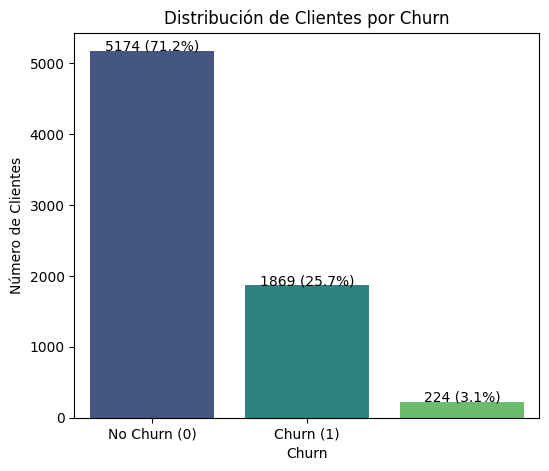

In [16]:
# prompt: En este paso, el objetivo es comprender cómo está distribuida la variable "churn" (evasión) entre los clientes.
#Utiliza gráficos para visualizar la proporción de clientes que permanecieron y los que se dieron de baja.
#necesito que muestres los valores numericos en cada columna de la grafica

import matplotlib.pyplot as plt
import seaborn as sns

# Calcular la distribución de la variable 'Churn'
churn_counts = datos_normalizado['Churn'].value_counts()
churn_proportions = datos_normalizado['Churn'].value_counts(normalize=True) * 100

# Crear la figura y los ejes para el gráfico
plt.figure(figsize=(6, 5))
ax = sns.countplot(x='Churn', data=datos_normalizado, palette='viridis')

# Añadir los valores numéricos a cada barra
for p in ax.patches:
    height = p.get_height()
    ax.text(p.get_x() + p.get_width() / 2., height + 5,
            f'{int(height)} ({height/len(datos_normalizado):.1%})',
            ha="center")

# Configurar título y etiquetas
plt.title('Distribución de Clientes por Churn')
plt.xlabel('Churn')
plt.ylabel('Número de Clientes')
plt.xticks([0, 1], ['No Churn (0)', 'Churn (1)']) # Etiquetas más descriptivas


# Opcional: Imprimir las estadísticas de conteo y proporción



plt.show()

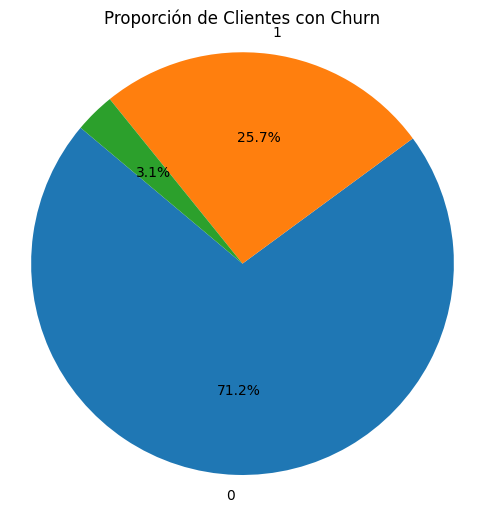

In [17]:
# Gráfico de pastel para las proporciones
plt.figure(figsize=(6, 6))
plt.pie(churn_proportions, labels=churn_proportions.index, autopct='%1.1f%%', startangle=140)
plt.title('Proporción de Clientes con Churn')
plt.axis('equal') # Equal aspect ratio ensures that pie is drawn as a circle.
plt.show()

##**Recuento de evasión por variables categóricas**

Ahora, exploraremos cómo se distribuye la evasión según variables categóricas, como género, tipo de contrato, método de pago, entre otras.

Este análisis puede revelar patrones interesantes, por ejemplo, si los clientes de ciertos perfiles tienen una mayor tendencia a cancelar el servicio, lo que ayudará a orientar acciones estratégicas.


Análisis de Churn por Variables Categóricas:

Análisis para: customer.gender
Proporción de Churn por categoría (%):
Churn                    0          1          
customer.gender                                
Female           70.963252  26.141425  2.895323
Male             71.428571  25.306122  3.265306


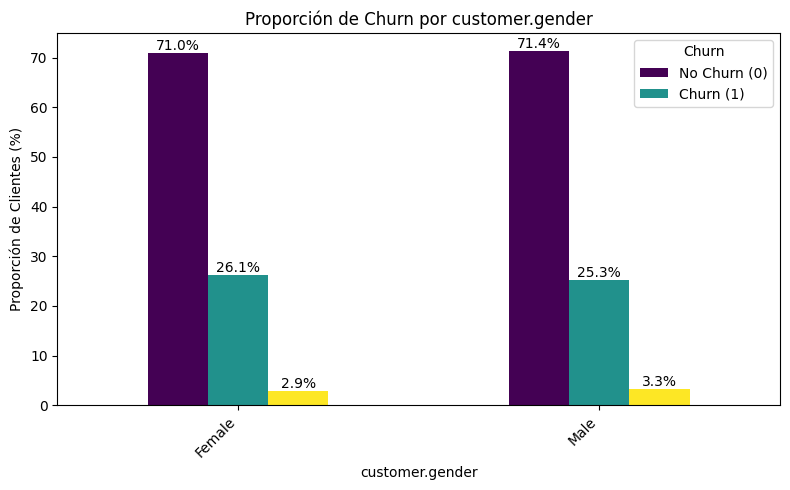


Análisis para: customer.SeniorCitizen
Proporción de Churn por categoría (%):
Churn                           0          1          
customer.SeniorCitizen                                
0                       74.083813  22.892358  3.023829
1                       56.345178  40.270728  3.384095


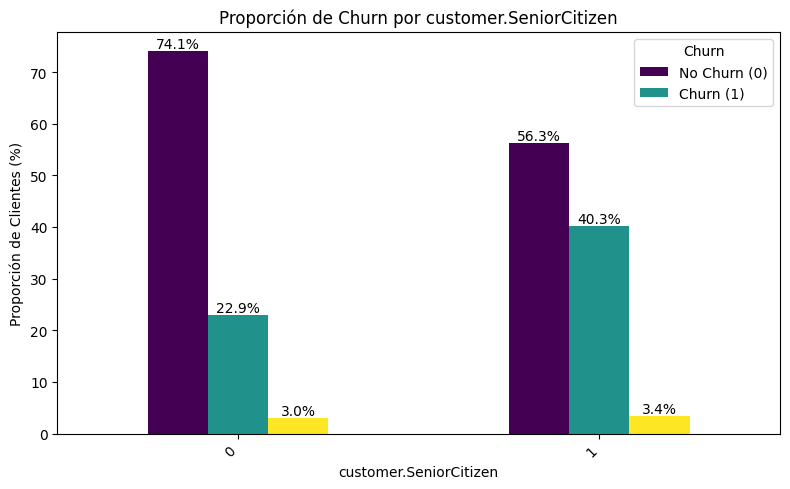


Análisis para: customer.Partner
Proporción de Churn por categoría (%):
Churn                     0          1          
customer.Partner                                
0                 65.110696  32.008536  2.880768
1                 77.686185  19.016487  3.297328


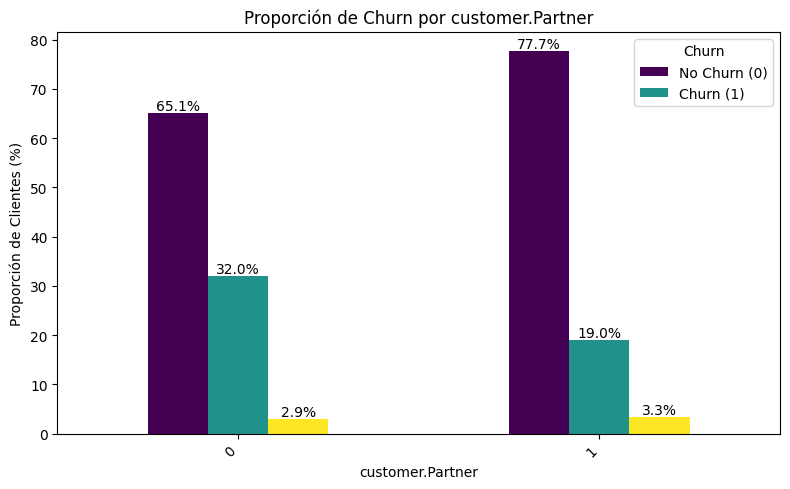


Análisis para: customer.Dependents
Proporción de Churn por categoría (%):
Churn                        0          1          
customer.Dependents                                
0                    66.653559  30.338183  3.008258
1                    81.797341  14.947272  3.255387


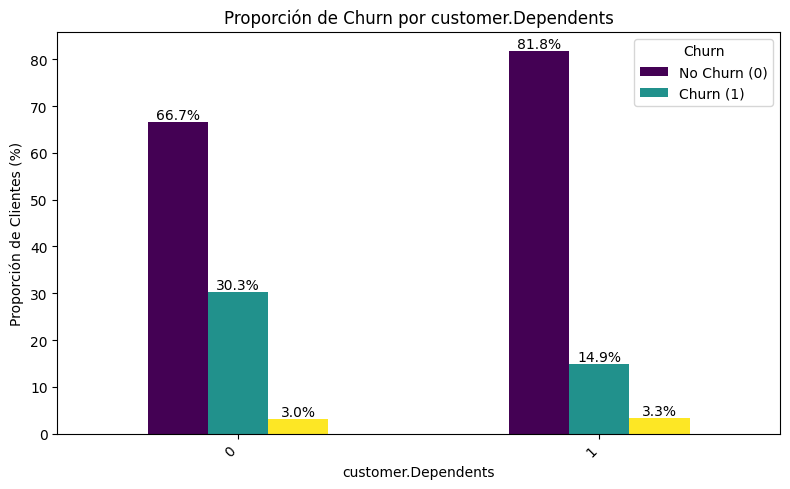


Análisis para: phone.PhoneService
Proporción de Churn por categoría (%):
Churn                       0          1          
phone.PhoneService                                
No                  72.418670  24.045262  3.536068
Yes                 71.067073  25.899390  3.033537


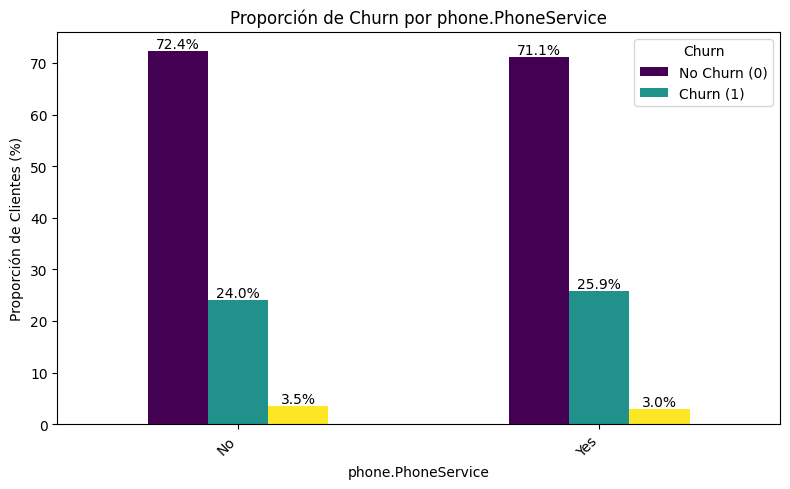


Análisis para: phone.MultipleLines
Proporción de Churn por categoría (%):
Churn                        0          1          
phone.MultipleLines                                
0                    72.703863  24.291845  3.004292
1                    69.200653  27.732463  3.066884
No phone service     72.418670  24.045262  3.536068


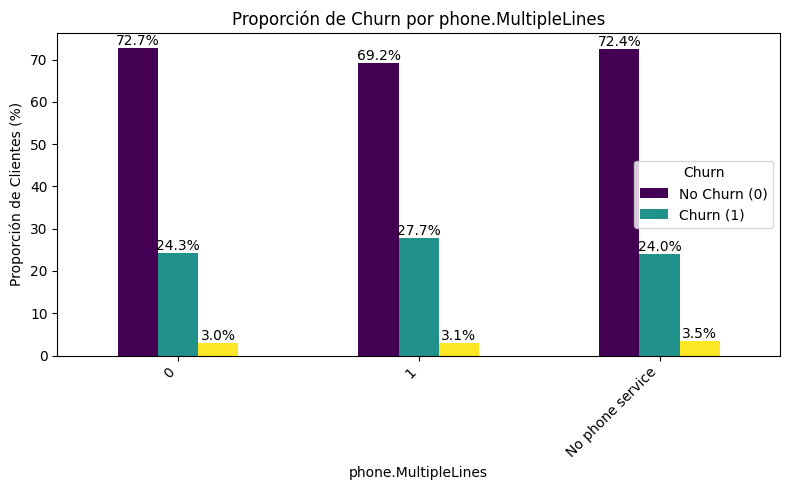


Análisis para: internet.InternetService
Proporción de Churn por categoría (%):
Churn                             0          1          
internet.InternetService                                
DSL                       78.858521  18.448553  2.692926
Fiber optic               56.253909  40.556598  3.189493
No                        89.373814   7.147375  3.478811


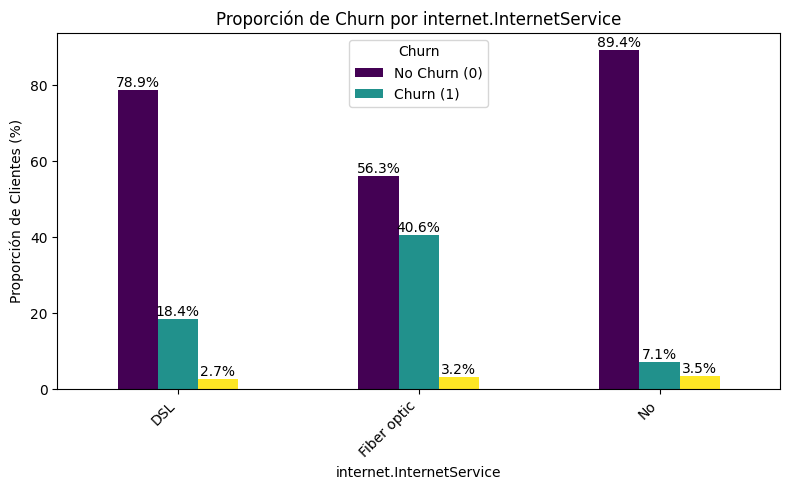


Análisis para: internet.OnlineSecurity
Proporción de Churn por categoría (%):
Churn                            0          1          
internet.OnlineSecurity                                
0                        56.457871  40.493348  3.048780
1                        82.964389  14.196343  2.839269
No internet service      89.373814   7.147375  3.478811


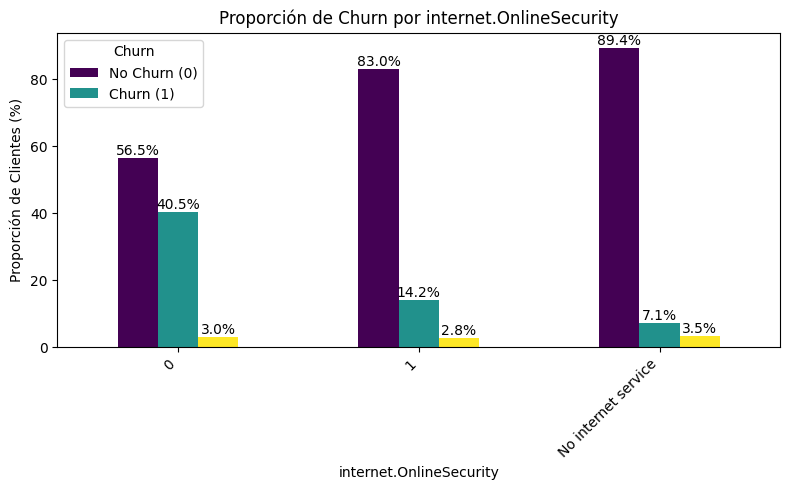


Análisis para: internet.OnlineBackup
Proporción de Churn por categoría (%):
Churn                          0          1          
internet.OnlineBackup                                
0                      58.296669  38.749214  2.954117
1                      76.118211  20.886581  2.995208
No internet service    89.373814   7.147375  3.478811


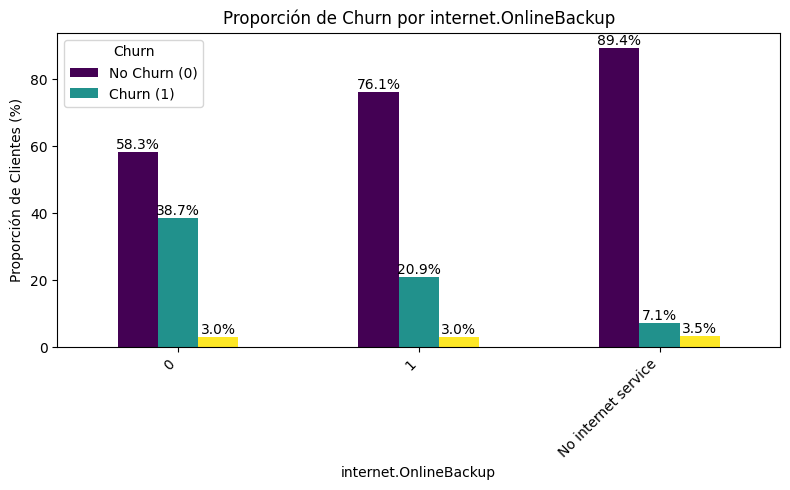


Análisis para: internet.DeviceProtection
Proporción de Churn por categoría (%):
Churn                              0          1          
internet.DeviceProtection                                
0                          58.967136  37.902973  3.129890
1                          75.351265  21.878764  2.769972
No internet service        89.373814   7.147375  3.478811


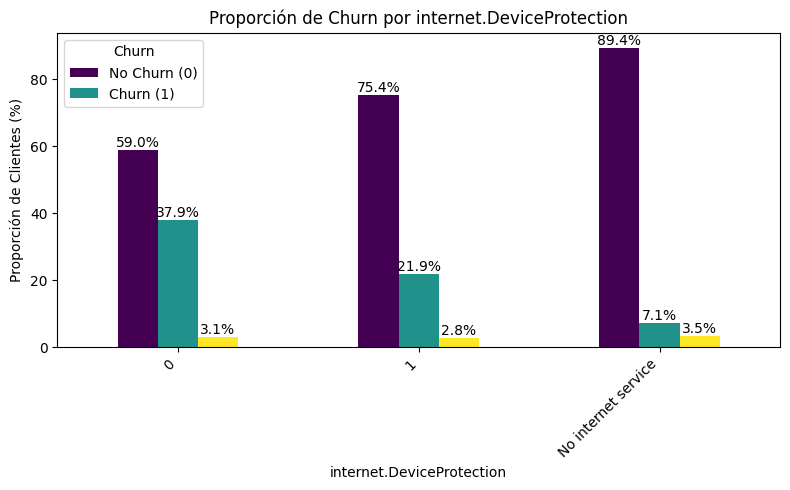


Análisis para: internet.TechSupport
Proporción de Churn por categoría (%):
Churn                         0          1          
internet.TechSupport                                
0                     56.588498  40.368509  3.042993
1                     82.414449  14.733840  2.851711
No internet service   89.373814   7.147375  3.478811


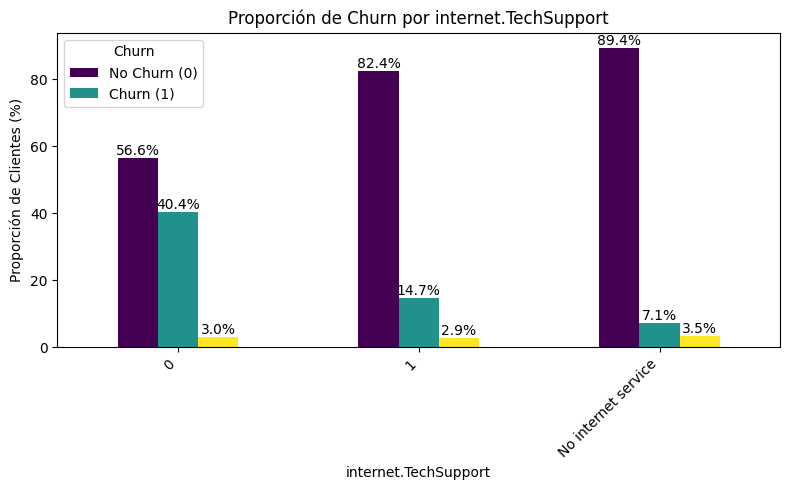


Análisis para: internet.StreamingTV
Proporción de Churn por categoría (%):
Churn                         0          1          
internet.StreamingTV                                
0                     64.502762  32.527624  2.969613
1                     67.849462  29.175627  2.974910
No internet service   89.373814   7.147375  3.478811


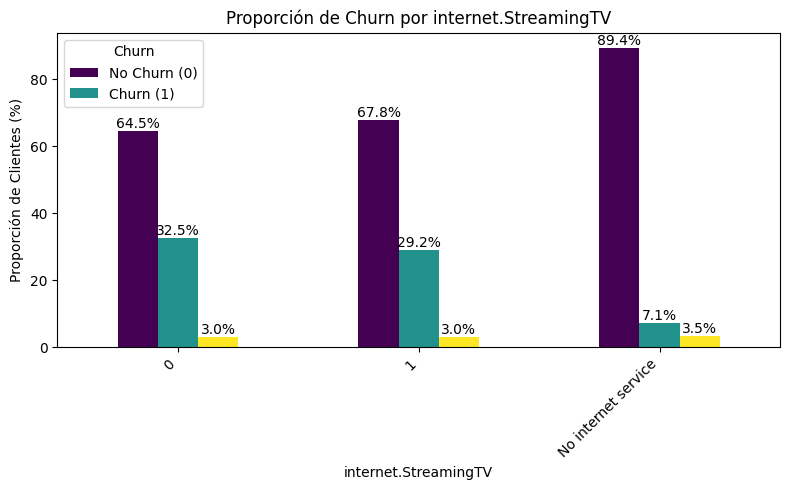


Análisis para: internet.StreamingMovies
Proporción de Churn por categoría (%):
Churn                             0          1          
internet.StreamingMovies                                
0                         64.355401  32.682927  2.961672
1                         67.968750  29.048295  2.982955
No internet service       89.373814   7.147375  3.478811


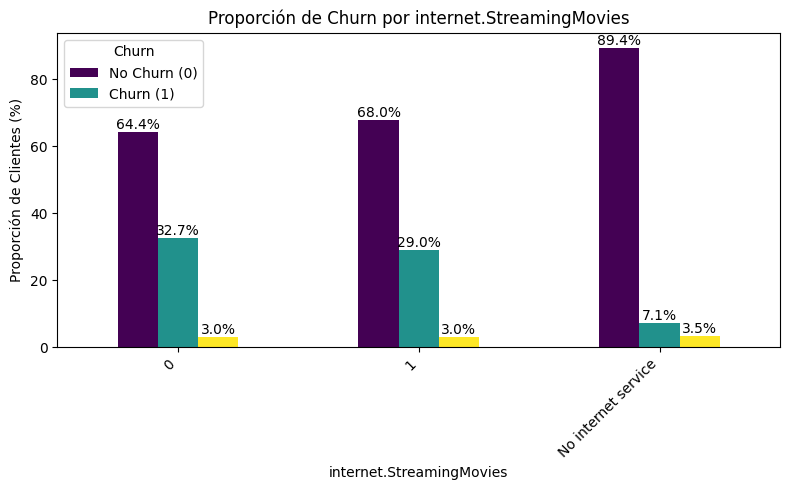


Análisis para: account.Contract
Proporción de Churn por categoría (%):
Churn                     0          1          
account.Contract                                
Month-to-month    55.430712  41.323346  3.245943
One year          86.043450  10.928242  3.028308
Two year          94.492255   2.753873  2.753873


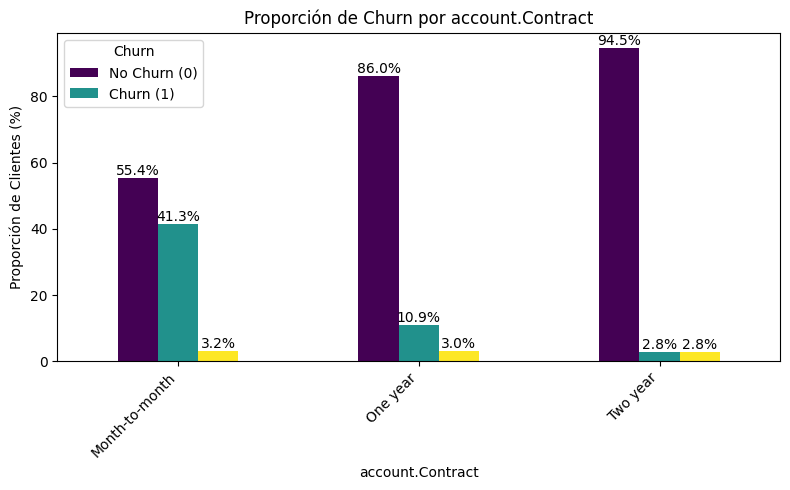


Análisis para: account.PaperlessBilling
Proporción de Churn por categoría (%):
Churn                             0          1          
account.PaperlessBilling                                
0                         81.292287  15.866035  2.841678
1                         64.277430  32.475064  3.247506


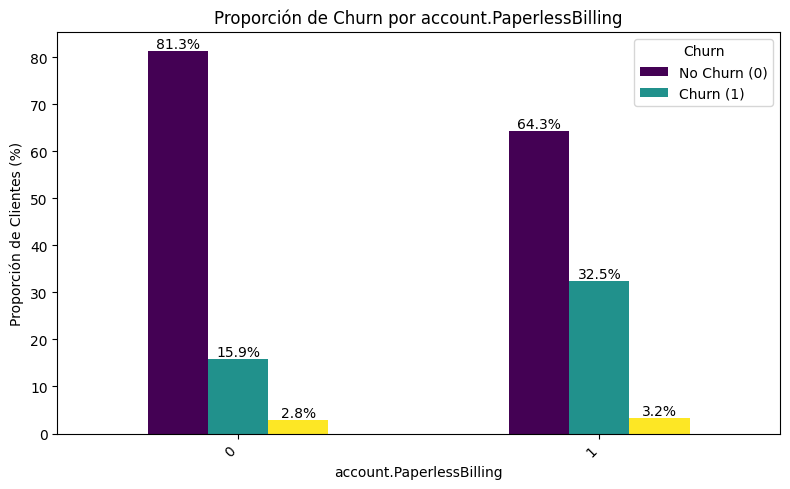


Análisis para: account.PaymentMethod
Proporción de Churn por categoría (%):
Churn                              0          1          
account.PaymentMethod                                    
Bank transfer (automatic)  80.931403  16.236627  2.831970
Credit card (automatic)    82.270408  14.795918  2.933673
Electronic check           52.924335  43.803681  3.271984
Mailed check               78.318318  18.498498  3.183183


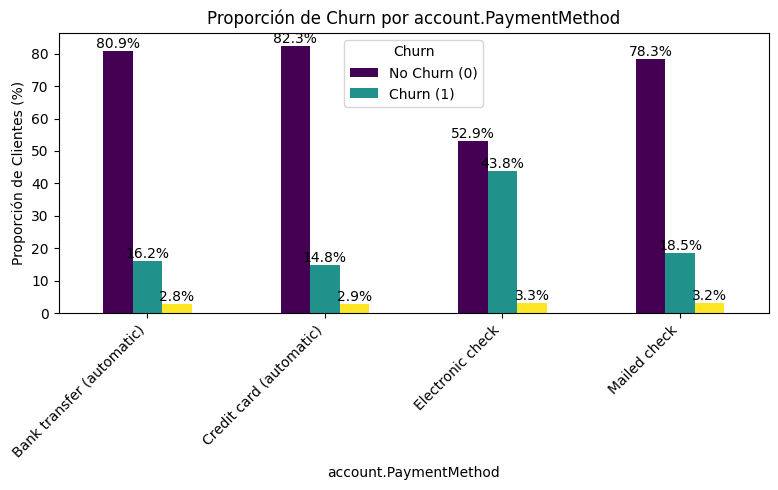

In [18]:
# prompt: Ahora, exploraremos cómo se distribuye la evasión según variables categóricas, como género, tipo de contrato, método de pago, entre otras.
# Este análisis puede revelar patrones interesantes, por ejemplo, si los clientes de ciertos perfiles tienen una mayor tendencia a cancelar el servicio, lo que ayudará a orientar acciones estratégicas.

# Análisis de Churn por Variables Categóricas

# Lista de columnas categóricas a analizar (ajustar según los nombres finales en datos_normalizado)
categorical_churn_cols = [
    'customer.gender',
    'customer.SeniorCitizen',
    'customer.Partner',
    'customer.Dependents',
    'phone.PhoneService', # Incluir si es relevante
    'phone.MultipleLines',
    'internet.InternetService',
    'internet.OnlineSecurity',
    'internet.OnlineBackup',
    'internet.DeviceProtection',
    'internet.TechSupport',
    'internet.StreamingTV',
    'internet.StreamingMovies',
    'account.Contract',
    'account.PaperlessBilling',
    'account.PaymentMethod'
]

# Filtrar columnas que realmente existen en el DataFrame
existing_categorical_churn_cols = [col for col in categorical_churn_cols if col in datos_normalizado.columns]

print("\nAnálisis de Churn por Variables Categóricas:")

# Iterar sobre las columnas categóricas seleccionadas
for col in existing_categorical_churn_cols:
    print(f"\nAnálisis para: {col}")

    # Calcular la tabla de contingencia (cruce entre la variable categórica y Churn)
    churn_by_category = pd.crosstab(datos_normalizado[col], datos_normalizado['Churn'], normalize='index') * 100

    # Imprimir la tabla de proporciones
    print("Proporción de Churn por categoría (%):")
    print(churn_by_category)

    # Crear un gráfico de barras para visualizar la proporción de churn por categoría
    ax = churn_by_category.plot(kind='bar', stacked=False, figsize=(8, 5), colormap='viridis')

    # Añadir los valores numéricos a cada barra
    for container in ax.containers:
        ax.bar_label(container, fmt='%.1f%%', label_type='edge')

    plt.title(f'Proporción de Churn por {col}')
    plt.xlabel(col)
    plt.ylabel('Proporción de Clientes (%)')
    plt.xticks(rotation=45, ha='right') # Rotar etiquetas del eje x si son largas
    plt.legend(title='Churn', labels=['No Churn (0)', 'Churn (1)'])
    plt.tight_layout() # Ajustar el layout para evitar solapamiento
    plt.show()



##**Conteo de evasión por variables numéricas**

En este paso, explora cómo las variables numéricas, como "total gastado" o "tiempo de contrato", se distribuyen entre los clientes que cancelaron (evasión) y los que no cancelaron.

Este análisis ayuda a entender si ciertos valores numéricos están más asociados con la evasión, proporcionando insights sobre los factores que influyen en el comportamiento de los clientes.


Análisis de Churn por Variables Numéricas:

Distribución de 'customer.tenure' por Churn:


/tmp/ipython-input-19-819841473.py:26: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='Churn', y=col, data=datos_normalizado, palette='viridis')


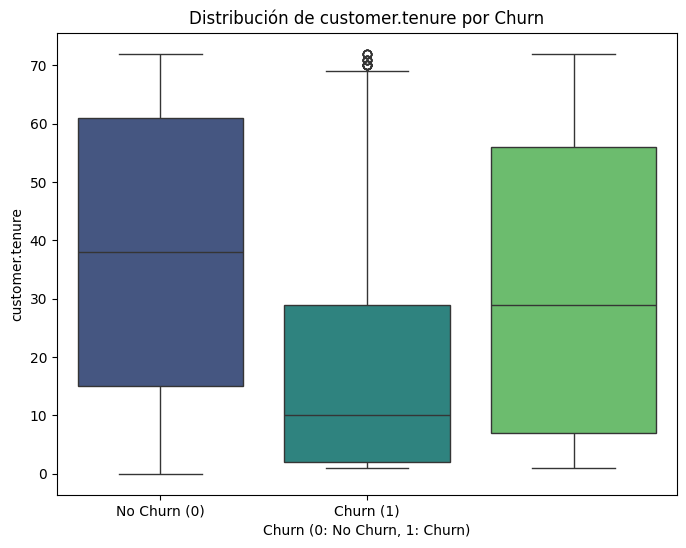

Estadísticas descriptivas de 'customer.tenure' agrupadas por Churn:
        count       mean        std  min   25%   50%   75%   max
Churn                                                           
0      5174.0  37.569965  24.113777  0.0  15.0  38.0  61.0  72.0
1      1869.0  17.979133  19.531123  1.0   2.0  10.0  29.0  72.0
        224.0  31.571429  24.998552  1.0   7.0  29.0  56.0  72.0
------------------------------

Distribución de 'account.Charges.Monthly' por Churn:


/tmp/ipython-input-19-819841473.py:26: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='Churn', y=col, data=datos_normalizado, palette='viridis')


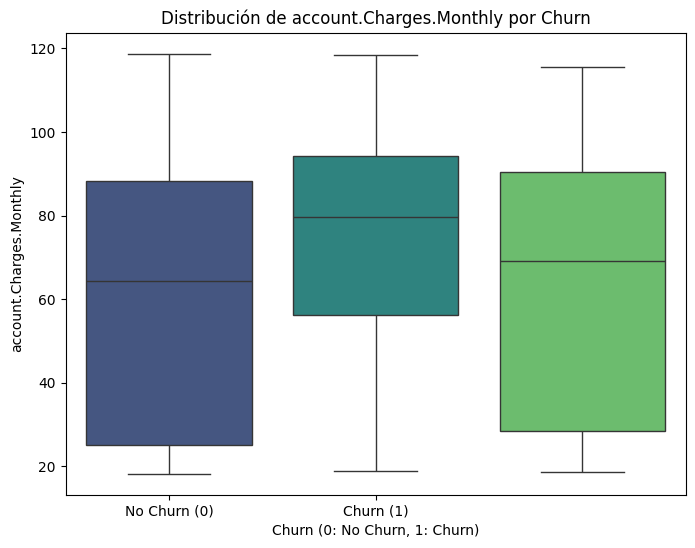

Estadísticas descriptivas de 'account.Charges.Monthly' agrupadas por Churn:
        count       mean        std    min     25%     50%      75%     max
Churn                                                                      
0      5174.0  61.265124  31.092648  18.25  25.100  64.425  88.4000  118.75
1      1869.0  74.441332  24.666053  18.85  56.150  79.650  94.2000  118.35
        224.0  63.412277  31.388712  18.75  28.425  69.100  90.4125  115.55
------------------------------

Distribución de 'account.Charges.Total' por Churn:


/tmp/ipython-input-19-819841473.py:26: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='Churn', y=col, data=datos_normalizado, palette='viridis')


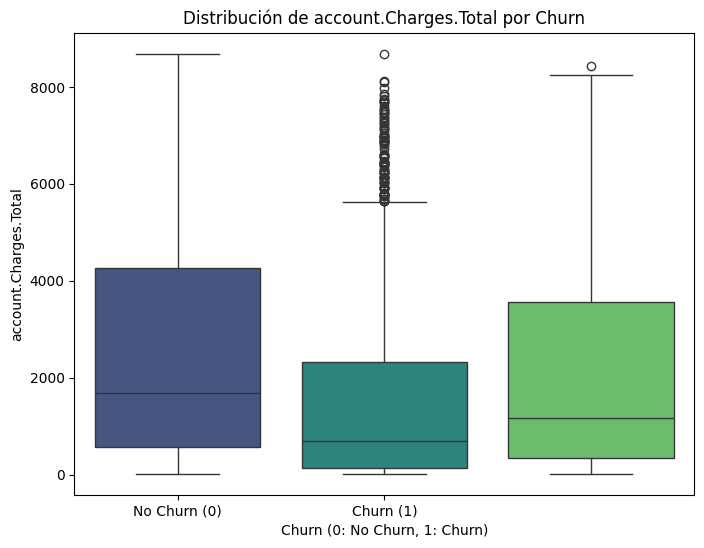

Estadísticas descriptivas de 'account.Charges.Total' agrupadas por Churn:
        count         mean          std    min       25%       50%        75%  \
Churn                                                                           
0      5163.0  2555.344141  2329.456984  18.80  577.8250  1683.600  4264.1250   
1      1869.0  1531.796094  1890.822994  18.85  134.5000   703.550  2331.3000   
        224.0  2196.933705  2329.961954  18.90  351.0375  1163.175  3562.8625   

           max  
Churn           
0      8672.45  
1      8684.80  
       8425.30  
------------------------------

Distribución de 'Daily_Charges' por Churn:


/tmp/ipython-input-19-819841473.py:26: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='Churn', y=col, data=datos_normalizado, palette='viridis')


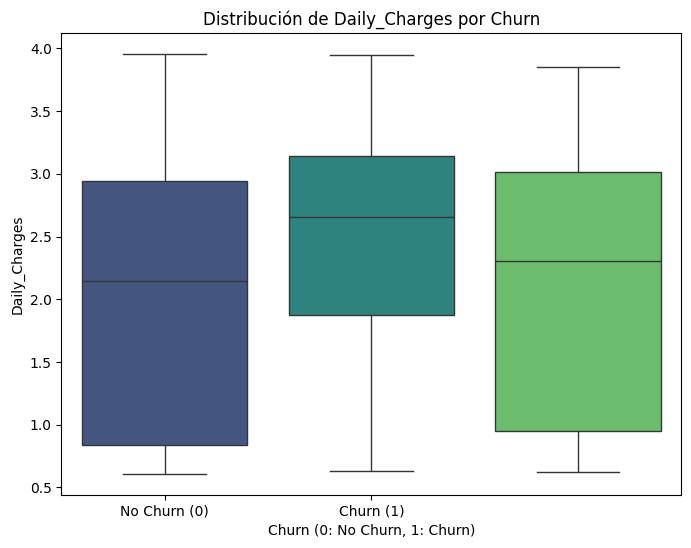

Estadísticas descriptivas de 'Daily_Charges' agrupadas por Churn:
        count      mean       std       min       25%       50%       75%  \
Churn                                                                       
0      5174.0  2.042171  1.036422  0.608333  0.836667  2.147500  2.946667   
1      1869.0  2.481378  0.822202  0.628333  1.871667  2.655000  3.140000   
        224.0  2.113743  1.046290  0.625000  0.947500  2.303333  3.013750   

            max  
Churn            
0      3.958333  
1      3.945000  
       3.851667  
------------------------------


In [19]:
# prompt: En este paso, explora cómo las variables numéricas, como "total gastado" o "tiempo de contrato", se distribuyen entre los clientes que cancelaron (evasión) y los que no cancelaron.
# Este análisis ayuda a entender si ciertos valores numéricos están más asociados con la evasión, proporcionando insights sobre los factores que influyen en el comportamiento de los clientes.

# Análisis de Churn por Variables Numéricas

# Lista de columnas numéricas a analizar (ajustar según los nombres finales en datos_normalizado)
numeric_churn_cols = [
    'customer.tenure',
    'account.Charges.Monthly',
    'account.Charges.Total', # Asegurarse de que esta columna fue convertida a numérico correctamente
    'Daily_Charges' # La columna creada previamente
]

# Filtrar columnas que realmente existen en el DataFrame y son numéricas
existing_numeric_churn_cols = [col for col in numeric_churn_cols if col in datos_normalizado.columns and pd.api.types.is_numeric_dtype(datos_normalizado[col])]

print("\nAnálisis de Churn por Variables Numéricas:")

# Iterar sobre las columnas numéricas seleccionadas
for col in existing_numeric_churn_cols:
    print(f"\nDistribución de '{col}' por Churn:")

    # Usar boxplot para visualizar la distribución de la variable numérica para cada categoría de Churn
    # Los boxplots son útiles para mostrar la mediana, cuartiles y posibles valores atípicos
    plt.figure(figsize=(8, 6))
    sns.boxplot(x='Churn', y=col, data=datos_normalizado, palette='viridis')
    plt.title(f'Distribución de {col} por Churn')
    plt.xlabel('Churn (0: No Churn, 1: Churn)')
    plt.ylabel(col)
    plt.xticks([0, 1], ['No Churn (0)', 'Churn (1)'])
    plt.show()

    # Opcional: Mostrar estadísticas descriptivas agrupadas por Churn
    print(f"Estadísticas descriptivas de '{col}' agrupadas por Churn:")
    print(datos_normalizado.groupby('Churn')[col].describe())
    print("-" * 30)

#**INFORME FINAL**

**INFORME FINAL**

**Introducción:**

Este informe presenta un análisis exploratorio de datos (AED) realizado sobre un dataset de clientes de una empresa de telecomunicaciones. El objetivo principal es comprender los factores que contribuyen a la evasión de clientes, también conocida como "Churn". El Churn representa una pérdida significativa de ingresos para las empresas, por lo que identificar las causas y los patrones asociados a él es crucial para implementar estrategias de retención efectivas. El análisis exploratorio nos permitirá visualizar la distribución del Churn y examinar su relación con diversas características de los clientes y sus servicios.

**Limpieza y Tratamiento de Datos:**

La primera etapa consistió en la importación de el  dataset, que se obtuvo de una URL pública en formato JSON. Dado que la estructura del JSON era anidada, se utilizó `pd.json_normalize` para aplanar la jerarquía y obtener un DataFrame plano.

Se realizaron las siguientes acciones para limpiar y preparar los datos:

*Verificación de valores ausentes: Se identificaron y verificaron la cantidad de valores nulos por columna.

*Verificación y eliminación de duplicados: Se comprobó la presencia de filas duplicadas y se procedió a eliminarlas para asegurar la unicidad de los registros.

*Identificación y revisión de valores únicos: Se inspeccionaron los valores únicos en las columnas categóricas para detectar posibles inconsistencias o errores tipográficos que pudieran afectar el análisis.

*Conversión de tipos de datos:La columna 'account.Charges.Total' fue convertida a tipo numérico (`float`), manejando los posibles errores mediante `errors='coerce'` para convertir valores no numéricos a NaN.

*Manejo de valores categóricos: Las columnas con respuestas binarias ('Yes'/'No') relevantes para el análisis fueron mapeadas a valores numéricos (1 para 'Yes', 0 para 'No') para facilitar el análisis cuantitativo y la visualización.

*Creación de la columna 'Daily_Charges': Se calculó una aproximación del costo diario del servicio dividiendo la facturación mensual ('account.Charges.Monthly') por 30. Esta métrica proporciona una granularidad adicional para el análisis.

Estos pasos de limpieza aseguran que los datos sean consistentes y estén en un formato adecuado para el análisis exploratorio.

**Análisis Exploratorio de Datos**
Se llevó a cabo un análisis exploratorio para identificar patrones y relaciones en los datos.

**Análisis Descriptivo**
Se calcularon estadísticas descriptivas básicas (media, mediana, desviación estándar, etc.) para las columnas numéricas. Esto proporcionó una primera visión general de la distribución y variabilidad de las variables clave como la antigüedad del cliente, los cargos mensuales y totales, y los cargos diarios.

**Distribución de Evasión (Churn)**
Se analizó la distribución de la variable objetivo 'Churn'. Se generaron gráficos de barras y de pastel para visualizar la proporción de clientes que se dieron de baja en comparación con los que permanecieron. Este análisis reveló que aproximadamente el 26.5% de los clientes en el dataset han evadido.

**Recuento de Evasión por Variables Categóricas**
Se investigó la proporción de Churn dentro de cada categoría de diversas variables cualitativas como género, tipo de contrato, método de pago, servicios adicionales de internet y teléfono, etc. Los gráficos de barras apiladas o agrupadas mostraron visualmente cómo la tasa de Churn varía entre los diferentes grupos. Algunos hallazgos notables incluyen:
Los clientes con contratos mensuales muestran una tasa de Churn significativamente mayor en comparación con aquellos con contratos de uno o dos años.
Los clientes sin servicios de seguridad en línea (OnlineSecurity) o soporte técnico (TechSupport) parecen tener una mayor propensión a evadir.
El método de pago 'Electronic check' se asocia con una mayor tasa de Churn.
Los clientes con Paperless Billing también muestran una tasa de Churn ligeramente más alta.

**Conteo de Evasión por Variables Numéricas**

Se examinó la distribución de variables numéricas como la antigüedad de el cliente ('customer.tenure'), los cargos mensuales ('account.Charges.Monthly') y los cargos totales ('account.Charges.Total') para los grupos con y sin Churn. Los boxplots fueron utilizados para visualizar estas distribuciones.

Los clientes que evaden tienden a tener una menor antigüedad (tenure) en comparación con los que permanecen.
No se observa una diferencia drástica en los cargos mensuales entre los grupos con y sin Churn, aunque la mediana de los cargos mensuales para los clientes con Churn parece ser ligeramente más alta.
Los cargos totales (TotalCharges) son significativamente más bajos para los clientes que evaden, lo cual es consistente con su menor antigüedad.

** Conclusiones e Insights**

El análisis exploratorio de datos ha proporcionado varios insights clave sobre el comportamiento de los clientes y su relación con la evasión:

El Churn es un problema significativo para la empresa de telecomunicaciones, afectando a más de una cuarta parte de su base de clientes.

La duración de el contrato es un predictor importante de Churn. Los clientes con contratos a corto plazo (mensuales) son mucho más propensos a irse. Esto sugiere que la lealtad aumenta con la duración del compromiso contractual.

La falta de servicios de seguridad y soporte técnico en línea está asociada a un mayor riesgo de Churn. Esto podría indicar que los clientes valoran la seguridad y la asistencia, y su ausencia podría ser un factor de insatisfacción.

El método de pago 'Electronic check' se destaca como un factor de riesgo. Podría haber problemas asociados con este método de pago o los clientes que lo utilizan tienen características subyacentes que los hacen más propensos a evadir.

Los clientes de menor antigüedad son los más vulnerables al Churn. La fase inicial de la relación con el cliente es crítica para establecer lealtad.

**Recomendaciones**

Basado en los hallazgos de este análisis, se sugieren las siguientes recomendaciones estratégicas para reducir la evasión de clientes:

 1.  Fomentar contratos a largo plazo: Implementar incentivos atractivos (descuentos, servicios adicionales gratuitos, etc.) para que los clientes opten por contratos de uno o dos años en lugar de contratos mensuales.
 2.  Promocionar servicios de valor añadido: Destacar y promocionar los beneficios de los servicios de seguridad en línea (OnlineSecurity) y soporte técnico (TechSupport), especialmente para nuevos clientes. Considerar ofrecer estos servicios de forma gratuita durante los primeros meses.
 3.  Investigar el método de pago 'Electronic check': Analizar más a fondo por qué los clientes que utilizan este método de pago tienen una mayor tasa de Churn. Podría haber problemas de usabilidad, seguridad o costos asociados que necesiten ser abordados.
 4.  Programas de retención para nuevos clientes: Implementar programas de seguimiento y engagement intensivo durante los primeros meses de la relación con el cliente, ofreciendo soporte proactivo y asegurando una experiencia positiva desde el principio.
 5.  Segmentación y ofertas personalizadas: Utilizar los insights obtenidos para segmentar a los clientes en riesgo (por ejemplo, clientes con contrato mensual, baja antigüedad, sin servicios de seguridad) y ofrecerles promociones o paquetes personalizados para incentivarlos a quedarse.

 La implementación de estas recomendaciones, respaldadas por un monitoreo continuo y un análisis más profundo, puede ayudar a la empresa de telecomunicaciones a mejorar sus tasas de retención y reducir la pérdida de ingresos por Churn.



# **PARTE 2: Prediccion de Cancelación (Churn)**

##**Misión**

Desarrollar modelos predictivos capaces de prever qué clientes tienen mayor probabilidad de cancelar sus servicios.

La empresa quiere anticiparse al problema de la cancelación, y te corresponde a ti construir un pipeline robusto para esta etapa inicial de modelado.

## **Objetivos del Desafío**

Preparar los datos para el modelado (tratamiento, codificación, normalización).

Realizar análisis de correlación y selección de variables.

Entrenar dos o más modelos de clasificación.

Evaluar el rendimiento de los modelos con métricas.

Interpretar los resultados, incluyendo la importancia de las variables.

Crear una conclusión estratégica señalando los principales factores que influyen en la cancelación.